<font color='red'>TOTAL: 88/100</font>

# Introductory applied machine learning (INFR10069)

# Assignment 1: Data analysis and visualisation

## Marking Breakdown

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

## Mechanics

Fill out this notebook, save it, and **submit it electronically as described below.**

Place your notebook in a directory called `iamlans` and submit this directory using the submit command on a DICE machine:

`submit iaml 1 iamlans`

Please note the importance of the number. **This should changed with each assignment!** Also note that submitting again will *overwrite* your previous submission. You can check the status of your submissions with the `show_submissions` command.

**Distance Learners:** To copy your work up to DICE (such that you can use the `submit` command) you can use `scp` or `rsync` (you may need to install these yourself). You can copy files up using `student.ssh.inf.ed.ac.uk`, then ssh in to submit, e.g. (in a unix terminal):
```
assignment_number=1
local_scp_folder=iamlans
UUN=s0816700
server_address=student.ssh.inf.ed.ac.uk
server_scp_folder=Downloads
scp -r ${local_scp_folder} ${UUN}@${server_address}:${server_scp_folder}
# rsync -rl ${local_scp_folder} ${UUN}@${server_address}:${server_scp_folder}
ssh ${UUN}@${server_address}
cd Downloads
submit iaml ${assignment_number} iamlans
```

**Late submissions:** The policy stated in the School of Informatics MSc Degree Guide is that normally you will not be allowed to submit coursework late. See http://www.inf.ed.ac.uk/teaching/years/msc/courseguide10.html#exam for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).

## Important Instructions

1. You *MUST* have your environment set up as in the [README](https://github.com/JamesOwers/iaml2017) and you *must activate this environment before running this notebook*:
```
source activate iaml
cd iaml_2017
jupyter notebook
# Navigate to this file
```

1. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers.

1. The .csv files that you will be using are located at `./datasets` (the `datasets` directory is adjacent to this file).

1. **IMPORTANT:** Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation.

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignemnt.

In [1]:
from __future__ import print_function, division
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sklearn
import seaborn as sns
%matplotlib inline

## Description of the dataset

This assignment is based on the 20 Newsgroups Dataset. This dataset is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related to each other (e.g. comp.sys.ibm.pc.hardware, comp.sys.mac.hardware), while others are highly unrelated (e.g misc.forsale, soc.religion.christian). 

There are three versions of the 20 Newsgroups Dataset. In this assignment we will use the `bydate` matlab version in which documents are sorted by date into training (60%) and test (40%) sets, newsgroup-identifying headers are dropped and duplicates are removed. This collection comprises roughly 61,000 different words, which results in a bag-of-words representation with frequency counts. More specifically, each document is represented by a 61,000 dimensional vector that contains the counts for each of the 61,000 different words present in the respective document. 

To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We will use documents from only 5 out of the 20 newsgroups, which results in a 5-class problem. More specifically the 5 classes correspond to the following newsgroups: 
1. `alt.atheism`
2. `comp.sys.ibm.pc.hardware`
3. `comp.sys.mac.hardware`
4. `rec.sport.baseball`
5. `rec.sport.hockey `

However, note here that classes 2-3 and 4-5 are rather closely related. Additionally, we computed the [mutual information](https://en.wikipedia.org/wiki/Mutual_information) of each word with the class attribute and selected the 520 words out of 61,000 that had highest mutual information. Therefore, our dataset is a $N \times 520$ dimensional matrix, where $N$ is the number of documents. For very sophisticated technical reasons 1 was added to all the word counts in part A. The resulting representation is much more compact and can be used directly to perform our experiments in Python.

## 1. Exploration of the dataset [40%]

Your first task is to get a feel for the data that you will be dealing with in the rest of the assignment.

### ========== Question 1.1 --- [5 marks] ==========
Load the datasets `train_20news_partA.csv` and `train_20news_partB.csv` into two separate pandas DataFrames.

In [2]:
cpu_loc = os.path.join(os.getcwd(), 'datasets', 'train_20news_partA.csv')
trainA = pd.read_csv(cpu_loc)
cpu_loc = os.path.join(os.getcwd(), 'datasets', 'train_20news_partB.csv')
trainB = pd.read_csv(cpu_loc)

<font color='red'>5</font>

### ========== Question 1.2 --- [3 marks] ==========
Display basic information for dataset A such as number of columns, type, and memory usage (*hint: pandas dataframes have a built in method for this*) 

In [3]:
trainA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2129 entries, 0 to 2256
Columns: 521 entries, w1_aaa to class
dtypes: int64(521)
memory usage: 8.5 MB


<font color='red'>3</font>

### ========== Question 1.3 --- [3 marks] ==========
How many data points and how many attributes are there in the dataset that we can use to model the target variable `class`?

There are 521 attributes and 2129 data points. Each word is an attribute so a total of 520 attributes.
The last column is a class column.

<font color='red'>2</font>

520 attributes (there are 521 variables, but the last column is the target variable)

### ========== Question 1.4 --- [3 marks] ==========
Use a Pandas method to display the summary statistics for the `news_A` DataFrame.

In [4]:
trainA.describe()

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
count,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.00000,2129.000000,2129.000000,2129.000000,2129.000000,...,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000
mean,5.128229,6.097698,6.120244,5.551902,5.521841,6.12776,5.633161,6.090653,5.970409,5.624706,...,9.666510,9.217473,9.061531,9.398309,9.175200,9.708783,8.807891,9.719587,9.307656,3.092532
std,38.292577,46.190953,46.656022,40.953913,40.978098,45.96434,41.146918,45.762060,44.266628,40.769105,...,45.844064,43.948910,40.969185,43.833064,42.403283,47.294120,39.341038,46.185082,45.059367,1.395948
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,3.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,4.000000
max,572.000000,583.000000,579.000000,580.000000,591.000000,600.00000,546.000000,591.000000,578.000000,578.000000,...,590.000000,587.000000,577.000000,598.000000,568.000000,599.000000,585.000000,600.000000,597.000000,5.000000


<font color='red'>3</font>

### ========== Question 1.5 --- [3 marks] ==========
Display the first 7 instances of dataset A.

In [5]:
trainA.head(7)

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
0,1,1,1,1,1,1,1,1,1,1,...,1,5,3,6,8,4,6,4,8,4
1,1,1,1,1,1,1,1,1,1,1,...,2,3,6,8,3,4,5,6,5,4
2,1,1,1,1,1,1,1,1,1,2,...,4,2,6,5,2,5,5,7,8,2
3,1,1,1,1,1,1,1,1,1,1,...,6,3,6,1,1,8,1,8,4,3
4,1,1,1,1,1,1,1,1,1,1,...,6,1,7,8,6,3,1,8,4,3
5,1,1,1,1,1,1,1,1,1,1,...,7,5,4,5,5,7,7,7,2,2
6,1,1,1,1,2,1,1,1,1,1,...,3,6,8,8,3,5,2,1,2,1


<font color='red'>3</font>

### ========== Question 1.6 --- [5 marks] ==========
Display the names of the first 100 attributes in dataset A. 

You might observe that each attribute consists of two parts:
1. `w<x>_` (where x is an index corresponding to each word)
2. the actual name of the word

In [6]:
print (trainA.columns[0:100])

Index([u'w1_aaa', u'w2_pins', u'w3_kmr', u'w4_notion', u'w5_queens',
       u'w6_dwyer', u'w7_defenseman', u'w8_gld', u'w9_tocchet', u'w10_home',
       u'w11_buying', u'w12_internet', u'w13_slots', u'w14_compatible',
       u'w15_transfer', u'w16_baltimore', u'w17_mean', u'w18_person',
       u'w19_performance', u'w20_support', u'w21_tor', u'w22_gm', u'w23_mouse',
       u'w24_base', u'w25_population', u'w26_bob', u'w27_set', u'w28_it',
       u'w29_earth', u'w30_faith', u'w31_steve', u'w32_caps', u'w33_printer',
       u'w34_east', u'w35_cable', u'w36_adapter', u'w37_mss', u'w38_catcher',
       u'w39_bullpen', u'w40_obp', u'w41_innocent', u'w42_european',
       u'w43_angeles', u'w44_settings', u'w45_words', u'w46_rit', u'w47_shots',
       u'w48_ports', u'w49_vga', u'w50_coverage', u'w51_jumpers', u'w52_bases',
       u'w53_sea', u'w54_pts', u'w55_behavior', u'w56_domi', u'w57_sabres',
       u'w58_yzerman', u'w59_messier', u'w60_goalies', u'w61_hawks',
       u'w62_our', u'w63_sx'

<font color='red'>5</font>

### ========== Question 1.7 --- [4 marks] ==========
Familiarise yourself with the [`stripplot`](https://seaborn.github.io/generated/seaborn.stripplot.html?highlight=stripplot#seaborn.stripplot) function in `seaborn`. Pick one attribute of your choice (except `class`) and display a stripplot for that attribute for dataset A. Demonstrate the distribution of the data separately for each class (by making appropriate use of the `x` argument in `stripplot`). Set the `jitter` argument to `True` and the `alpha` argument to an appropriate value (to add transparency). When the jitter parameter is enabled a small amount of noise is added to the data so that there is less overlap and the distribution is easier to visualise.

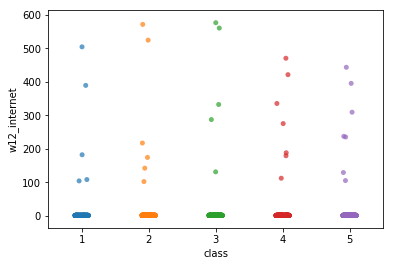

In [7]:
ax = sns.stripplot(x="class", y="w12_internet", data=trainA, jitter=True, alpha=0.7)

### ========== Question 1.8 --- [4 marks] ==========
The stripplot illustrates the distribution of a single attribute. We can also visualise the joint distribution of two variables by using a scatter plot. Again, we want to add a bit of noise into the data so that is easier to see which parts of the space (2-dimensional in our case) have larger probability densities. 

For this, you will be using the function `scatter_jitter` provided below. This function takes as input two numpy arrays containing the features of interest. Pick two attributes of your choice from dataset A and use the provided function to plot their joint distribution. You can play around with the amount of noise added by tweaking the `jitter` parameter. Alternatively, you can just use its default value which is set to 0.2.

In [8]:
def scatter_jitter(arr1, arr2, jitter=0.2):
    """ Plots a joint scatter plot of two arrays by adding small noise to each example. 
    Noise is proportional to variance in each dimension. """
    arr1 = np.asarray(arr1)
    arr2 = np.asarray(arr2)
    arr1 = arr1 + jitter*arr1.std(axis=0)*np.random.standard_normal(arr1.shape)
    arr2 = arr2 + jitter*arr2.std(axis=0)*np.random.standard_normal(arr2.shape)
    plt.scatter(arr1, arr2, marker=4)

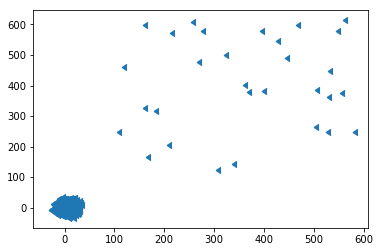

In [9]:

scatter_jitter(trainA['w31_steve'], trainA['w70_kill'])

<font color='red'>4</font>

### ========== Question 1.9 --- [7 marks] ==========
From the strip and scatter plots above you might observe that there is something peculiar about the data. Indeed most attributes take very small values (usually in the range 1-10) but there are some data points (i.e. rows) in the dataset where the attributes take very large values. These data points are called [outliers](https://en.wikipedia.org/wiki/Outlier).

You might think that the presence of outliers in the dataset has been a resut of noise contamination (you wouldn't expect the same word to appear 600 times within an e-mail, would you?). Your job now is to create a new dataset from dataset A (name it `news_A_clean`) and remove the outliers. Create some metric to find the outliers and check that your metric is reasonable. Be careful not to alter the original `news_A`...we may require it in its dirty format later...

In [10]:
news_A_clean = trainA.copy(deep=True)
news_A_clean=news_A_clean[news_A_clean < 100]

<font color='red'>4</font>

Altought the criteria seems correct, it is important to prove is the correct one. One way of prove it is by plotting the data showing the outliers, and the result of the data after cleanning it.

### ========== Question 1.10 --- [3 marks] ==========
Write code to return the number of data points in the clean dataset, and the number of documents that have been excluded as outliers

In [11]:
news_A_clean.dropna(inplace=True)
print('Number of data point:', news_A_clean.shape[0])
print('Excluded outliers:', trainA.shape[0]-news_A_clean.shape[0])

Number of data point: 2091
Excluded outliers: 38


<font color='red'>3</font>

## 2. Naive Bayes classification [60%]
Now we want to fit a Gaussian Naive Bayes model to the cleaned dataset A. You might want first to familiarise yourself with the [`GaussianNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) class in `Sklearn`.

### ========== Question 2.1 --- [4 marks] ==========

By using the `scatter_jitter` function provided above, display a scatter plot of the features `w281_ico` and `w273_tek` for the cleaned dataset A. Set the jitter value to something small (e.g. 0.1). Label axes appropriately.

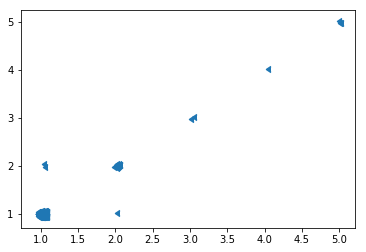

In [12]:
scatter_jitter(news_A_clean['w281_ico'], news_A_clean['w273_tek'], jitter=0.1)

<font color='red'>4</font>

### ========== Question 2.2 --- [6 marks] ==========
What do you observe? 

How does that relate to the Naive Bayes assumption? 

What would be the main issue we would have to face if we didn't make this assumption?

The graph seems to show a linear relation between the two variables once the noise has been removed from the data.
The Naive Bayes assumption states that the features are independent of each other given the class.
If we didn't make the Naive Bayes assumption (conditional independence given the label) we would have to estimate a full covariance matrix of size 520 X 520 and we only have 2129 samples, so the covariance estimate might be dominated by noise. Assuming conditional independence allows us to esimate a diagonal covariance matrix i.e. estimate a variance for each variable independently and assume all covariances between distinct variables are 0.

<font color='red'>4</font>

Explain further what does it mean only having 2129 samples. This means that estimating the full covariance matrices (one for each class) is practically impossible with finite amout of data.

### ========== Question 2.3 --- [5 marks] ==========
Fit a Gaussian Naive Bayes model to the cleaned dataset A. Your input features should be all the attributes in the dataset except the `class` attribute which will be your target. Display the classification accuracy on the training dataset.

In [13]:
# Your code goes here
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
X = news_A_clean.drop('class', axis=1)
Y = news_A_clean['class']
clf.fit(X, Y)
clf.score(X, Y)

0.88904830224772835

<font color='red'>5</font>

### ========== Question 2.4 --- [5 marks] ==========
Plot the (normalised) confusion matrix for the training data. Label axes appropriately.

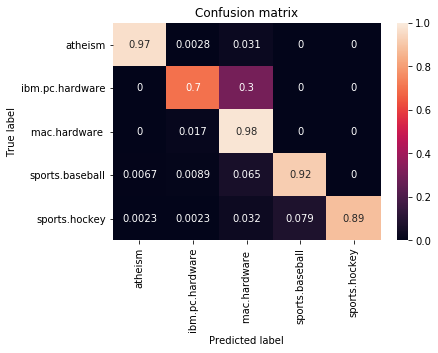

In [14]:
# Your code goes here
from sklearn.metrics import confusion_matrix
tr_pred=clf.predict(X=X)
cm = confusion_matrix(Y, tr_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
plt.figure()
plot_confusion_matrix(cm_norm, ['atheism','ibm.pc.hardware','mac.hardware ','sports.baseball', 'sports.hockey'])

<font color='red'>5</font>

### ========== Question 2.5 --- [3 marks] ==========

Comment on the confusion matrix from the previous question. Does it look like what you would have expected? Explain.

The confusion matrix shows that the model performed well. If we follow the values along the diagonal that shows what percentage of the values were predicted to have the correct label. Most of the values are very high. We were told that the ibm and mac classes(2 and 3) were closesly related. This confusion can be seen in the matrix as 30% of entries that were actually ibm were predicted to be mac. Similarly 7.9% of entries that were hockey were predicted to be baseball, these two were also supposed to be closesly related.

<font color='red'>2</font>

comp.sys.mac.hardware is rarely mistaken for comp.sys.ibm.pc.hardware. This implies we are over predicting mac and underpredicting ibm. Perhaps there is an imbalance in the training data.

### ========== Question 2.6 --- [5 marks] ==========
Fit a Gaussian Naive Bayes model to the original dataset A (including the outliers). Display the classification accuracy on the training dataset.

In [15]:
clf_new = GaussianNB()
Xnew = trainA.drop('class', axis=1)
Ynew = trainA['class']
clf_new.fit(Xnew, Ynew)
clf_new.score(Xnew, Ynew)

0.20526068576796619

<font color='red'>5</font>

### ========== Question 2.7 --- [4 marks] ==========
Comment on the above results (Questions 2.3 & 2.6). In particular explain why you think that cleaning the data helps in this case.

The classification accuracy without the outliers is 0.889 and with them is 0.20. This is a significant difference showing that removing outliers is very important. Cleaning the data helps because outliers significantly skew the mean and standard deviation of the data. It essentially ends up giving a false image of the true trend of the data. One outlier can result in the entire prediction being biased towards the outlier. 

<font color='red'>4</font>

### ========== Question 2.8 --- [5 marks] ==========

Now we want to evaluate the generalisation of the classifier on new (i.e. unseen data). Use the classifier you trained in Question 2.5 (i.e. on the cleaned dataset) and test its performance on dataset `train_20news_partB`. 

Display the (normalized) confusion matrix and the classification accuracy on the Dataset B.

0.8359375


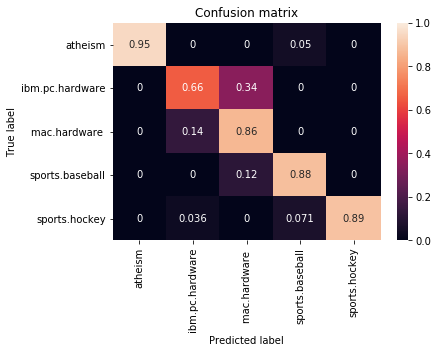

In [16]:
Xtest= trainB.drop('class', axis=1)
test_pred=clf.predict(X=Xtest)
Ytest=trainB['class']
cmtest = confusion_matrix(Ytest, test_pred)
cmtest_norm = cmtest/cmtest.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cmtest_norm, ['atheism','ibm.pc.hardware','mac.hardware ','sports.baseball', 'sports.hockey'])
matrixtest=clf.score(Xtest, Ytest)
print(matrixtest)

<font color='red'>5</font>

### ========== Question 2.9 --- [4 marks] ==========

Comment on the results from the previous question. Do you think this is an acceptable level of performance? Which are the easiest and most difficult classes to predict correctly? 

The performance is good as most classes have a correct rate of prediction. The only worrying performance was on ibm and mac variables, as 34% of ibm was predicted as mac. The easiest class to predict is the atheism class with a 95% correct score. ibm class is the most difficult to predict.

<font color='red'>4</font>


### ========== Question 2.10 --- [4 marks] ==========
What is a reasonable baseline against which to compare the classiffication performance? *Hint: What is the simplest classiffier you can think of and what would its performance be on this dataset?* 

The simplest classifier I can think of is a dummy classifier. It basically chooses a predicted class based on what classes are more prevalent in the data. Since it is essentially guessing based on prevalence of classes it would have a poor performance.

<font color='red'>2</font>

It's not so clear what do you mean with more prevalent classes. The correct baseline is a classifier that classifies everything as the class with the highest prior probability, i.e. the class that occurs most frequently in the data. In our case, this is class 4.

### ========== Question 2.11 --- [4 marks] ==========

Estimate the baseline performance.

In [17]:
from sklearn.dummy import DummyClassifier
dc = DummyClassifier()
dc.fit(X, Y)
print('Baseline Score:',dc.score(X, Y))

Baseline Score: 0.217120994739


<font color='red'>2</font>

Showing the class with highest prior probability is important. In the case of your assumption, it would be showing the most prevalent classes.

### ========== Question 2.12 --- [3 marks] ==========

Execute the cell below to get the prediction on the test dataset by using a different classifier which we will be introducing in this class later on. By using this prediction provided below (`rf_prediction`) plot the confusion matrix and display the classification accuracy on the test dataset. *Important: Make sure the test dataset is loaded in a DataFrame called `news_B` otherwise execution will return an error. In that case replace the DataFrame name in the third line.*

Classification Accuracy:  0.890625


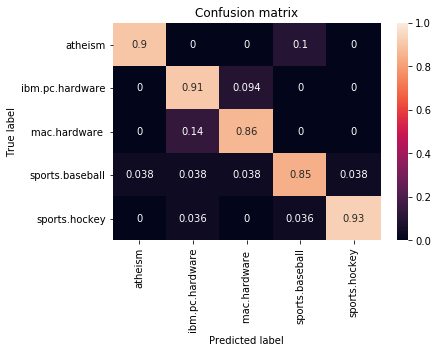

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 50).fit(X=news_A_clean.drop("class", axis=1), y=news_A_clean["class"])
X_ts = trainB.drop('class', axis=1)
rf_prediction = rf.predict(X=X_ts)
print('Classification Accuracy: ',rf.score(X_ts,Ytest))
newmatrix=confusion_matrix(Ytest, rf_prediction)
normnewmatrix=newmatrix/newmatrix.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(normnewmatrix, ['atheism','ibm.pc.hardware','mac.hardware ','sports.baseball', 'sports.hockey'])

<font color='red'>3</font>

### ========== Question 2.13 --- [8 marks] ==========

Which classifier (Naive Bayes or Random Forest) would you trust if you had to choose? What are the reasons you believe the Gaussian Naive Bayes classifier does not perofm so well in this particular problem? You are not expected to justify the performance level achieved by the Random Forest classifier. Feel free to use code and plots to illustrate your points.

Naive Bayes can not be trusted in all situations, therefore I would only trust it when I know certain things about the data. You have a zero frequency problem when you don't observe a count-valued attribute for a particular class. As a result, any new data point which contains a zero-frequency attribute will be always classified as another class. Naive Bayes can be fooled by correlated attributes. Naive Bayes can't classify data points as it relies on marginal distribution of attributes given class to do classification. If the distinguishing characteristic for classification is not the marginal distributions but correlation, then Naive Bayes won't be a good choice. We saw that Naive Bayes predicts a lot of ibm as mac. The larger the dataset the worse Naive Bayes performs, with precision and recall falling off. Naive Bayes also takes prior probability into account so it has a bias towards classes with more data points. It is affected a lot by outliers.

In [19]:
print ('Naive Bayes score with outliers:', clf_new.score(Xnew, Ynew) )
print ('Random Forest Score score with outliers:', rf.score(X_ts,Ytest) )

Naive Bayes score with outliers: 0.205260685768
Random Forest Score score with outliers: 0.890625


<font color='red'>7</font>

Showing a plot about your assumptions would be a good choice to support them.